# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**
       
### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

# 1. nxn numpy matrix

In [15]:
import numpy as np

In [16]:
def generate_matrix(n, a, b):
    matrix = np.random.randint(a, b, size=(n, n))
    return matrix

generate_matrix(3, 1, 1000)

array([[594, 613, 189],
       [105, 650, 132],
       [342, 158, 972]])

# 2. Count Plot of Top 20 Occurring Words

In [55]:
f_networks = open("data/networks.txt", "r")
networks = f_networks.read()

f_stop = open("data/stop.txt", "r")
stop = f_stop.read()

In [72]:
lines = stop.split('\n')
stop_lines = []

# There are some words which don't have closing apostrophes, so we programmatically add them here
for line in lines:
    curr_line = line
    if ',' in line:
        if line[0] == "\'" and line[-2] != "\'":
            curr_line = line[:-1] + "\',"
        elif line[0] == "\"" and line[-2] != "\"":
            curr_line = line[:-1] + "\","
    stop_lines.append(curr_line)

stopwords = [word[1:-2] if count != len(stop_lines)-1 else word[1:-1] 
             for count, word in enumerate(stop_lines)]

In [74]:
len(stopwords)

180

In [75]:
import re

# Removed non-alphanumeric chars EXCEPT apostrophes that follow a letter (so as to include contractions)
words = [re.sub(r'\W+$', '', word).lower() for word in networks.split(' ')]
words = [word for word in words if word not in stopwords]

In [76]:
len(words)

640

In [77]:
from collections import Counter

cnt = Counter(words)
top20 = cnt.most_common()[:20]
top20

# Source: https://stackoverflow.com/questions/4088265/sorted-word-frequency-count-using-python

[('to', 56),
 ('network', 18),
 ('computers', 8),
 ('file', 8),
 ('going', 7),
 ('you', 7),
 ('problems', 7),
 ('never', 6),
 ('time', 6),
 ('companies', 6),
 ('system', 6),
 ('access', 6),
 ('files', 6),
 ('also', 6),
 ('one', 5),
 ('however', 5),
 ('technology', 5),
 ('speeds', 5),
 ('saved', 5),
 ('costs', 4)]

<BarContainer object of 20 artists>

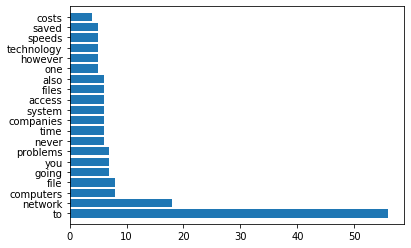

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

f, ax = plt.subplots()
plt.yticks(range(len(top20)), list([curr[0] for curr in top20]))
plt.ylim(-1, len(top20))
plt.barh(range(len(top20)), list([curr[1] for curr in top20]), align='center')

# 3. Ateneo Translations

In [40]:
ateneo = open("data/ateneo.txt", "r").read()
translation = open("data/tl-en.txt", "r").read()

ateneo_lines = ateneo.split('\n')

# For the sake of simplicity of code, I used a dict function that converts the zip object to a dictionary. 
# dict only takes the LAST occurrence/translation of the key if there are multiple translations. I opted
# to go with this as mapping the meanings of the translations to the words would be too complex at this point.
translations = dict(zip([line.split('\t')[0] for line in translation.split('\n')[:-1]], 
                   [line.split('\t')[1] for line in translation.split('\n')[:-1]]))

In [47]:
def clean_word(word):
#   Remove non-alphanumeric characters that are at the start or the end of the word
    return re.sub(r'\B\W+\b|\b\W+\B', '', word).lower()

In [48]:
trans_phrases = [' '.join([clean_word(word) if clean_word(word) not in translations 
                           else translations[clean_word(word)] for word in line.split()]) for line in ateneo_lines]

trans_phrases

["manong to only d'yan sa have side",
 'mej hassle naman this rain',
 'what bro katip later g',
 "wait i'm like gonna dinner only with the fambam",
 'which car am i gonna take today so',
 "don't make stitch sa fishball first it's not cuisine yet",
 'brother much po yung neon balls',
 'pweds ka ba later',
 "ugh there's no parking space pa eh i'm late na nga",
 "it's like super intense really as in extreme",
 "i'll make goodbye pa you know naman my dad is strict eh",
 "you're like so duration ha",
 'make it fast only ha',
 "what's wrong with being conyo ba"]

# 4. English Song to Filipino

In [49]:
# So Close by Jon McLaughlin
so_close = """You're in my arms
And all the world is gone
The music playing on
For only two
So close together
And when I'm with you
So close to feeling alive
A life goes by
Romantic dreams must die
So I bid mine goodbye
And never knew
So close was waiting, waiting here with you
And now forever I know...
All that I want is to hold you so close
So close to reaching that famous happy end
Almost believing this one's not pretend
And now you're beside me, and look how far we've come
So far, we are so close
Oh how could I face the faceless days
If I should lose you now?
We're so close to reaching that famous happy end
Almost believing this one's not pretend
Let's go on dreaming, though we know we are
So close, so close, and still so far"""

In [80]:
from pattern.text.en import singularize
import re

# Make word singular using the imported singularize method
def singularize_word(word):
    return singularize(word)

# Remove punctuation at start and end of each word and make lowercase a given line
# I kept the contractions by not removing the apostrophes that follow a letter
def clean_line(line):
    words = [re.sub(r'\B\W+\b|\b\W+\B', '', word).lower() for word in line.split()]
    return ' '.join(words)

# Source: https://stackoverflow.com/questions/31387905/converting-plural-to-singular-in-a-text-file-with-python

In [81]:
translation = open("data/tl-en.txt", "r").read()

# English to Filipino translations

# Same as above, I only got the last occurrence of the translation for the sake of code simplicity,
# given that the dict method only gets the last occurrence
fil_translations = dict(zip([line.split('\t')[1] for line in translation.split('\n')[:-1]], 
                   [line.split('\t')[0] for line in translation.split('\n')[:-1]]))

In [82]:
so_close_lines = so_close.split('\n')
translated_lines = [' '.join([singularize_word(word) if singularize_word(word) not in fil_translations else
                              fil_translations[singularize_word(word)] for word in clean_line(line).split()]) 
                    for line in so_close_lines]

# Kaya Isara ni Jon McLaughlin
translated_lines

["you're nasa my bisig",
 'and puro yung mundo is gone',
 'yung tugtog paglalaro noong',
 'for lang two',
 'kaya isara magkasama',
 "and kailan i'm kay ikaw",
 'kaya isara kay feeling buhay',
 'a buhay pumunta by',
 'romantiko pinapangarap dapat mamamatay',
 'kaya i bid mine paalam',
 'and never alam',
 'kaya isara wa waiting waiting nandito kay ikaw',
 'and ngayon magpakailanman i alam',
 'puro yan i gustong is kay hold ikaw kaya isara',
 'kaya isara kay naaabot yan famou masaya tapusin',
 "halos mananampalataya thi one' hinde pretend",
 "and ngayon you're katabi me and tumingin pano kalayo we've lumapit",
 'kaya kalayo kami are kaya isara',
 'oh pano could i mukha yung faceles araw',
 'kung i dapat mawawalan ikaw ngayon',
 "we're kaya isara kay naaabot yan famou masaya tapusin",
 "halos mananampalataya thi one' hinde pretend",
 "let' pumunta noong nananaginip though kami alam kami are",
 'kaya isara kaya isara and parin kaya kalayo']

# Bonus: Filipino to English Translation

In [83]:
# Pagtingin by Ben&Ben
song = """Dami pang gustong sabihin
Ngunit 'wag nalang muna
Hintayin nalang ang hangin
Tangayin ang salita
'Wag mo akong sisihin
Mahirap ang tumaya
Dagat ay sisisirin
Kahit walang mapala
Pag nilahad ang damdamin
Sana di magbago ang pagtingin
Aminin ang mga lihim
Sana di magbago ang pagtingin
Bakit laging ganito?
Kailangan magka-ilangan
Ako ay nalilito
Hmm... hmm...
'Wag mo akong sisihin
Mahirap ang tumaya
Dagat ay sisisirin
Kahit walang mapala
Pag nilahad ang damdamin
Sana di magbago ang pagtingin
Aminin ang mga lihim
Sana di magbago ang pagtingin
Pahiwatig
Sana di magbago ang pagtingin
Pahiwatig
Sana di magbago ang pagtingin
Iibig lang kapag handa na
Hindi nalang kung trip trip lang naman
Iibig lang kapag handa na
Hindi nalang kung trip trip lang naman
Pag nilahad ang damdamin
Sana di magbago ang pagtingin
Aminin ang mga lihim
Sana di magbago ang pagtingin
Subukan ang manalangin
Sana di magbago ang pagtingin
Baka bukas ika'y akin
Sana di magbago ang pagtingin
Pahiwatig
Sana di magbago ang pagtingin
Pahiwatig
Sana di magbago ang pagtingin"""

In [84]:
from pattern.text.en import singularize
import re

# Remove punctuation and make lowercase a given line
def clean_line(line):
    words = [re.sub(r'\W+', '', word).lower() for word in line.split()]
    return ' '.join(words)

# Source: https://stackoverflow.com/questions/31387905/converting-plural-to-singular-in-a-text-file-with-python

In [85]:
translation = open("data/tl-en.txt", "r").read()

# Filipino to English translations
# Same as above with regards to getting the last occurrence only
eng_translations = dict(zip([line.split('\t')[0] for line in translation.split('\n')[:-1]], 
                   [line.split('\t')[1] for line in translation.split('\n')[:-1]]))

In [86]:
song_lines = song.split('\n')
translated_lines = [' '.join([word if word not in eng_translations else
                              eng_translations[word] for word in clean_line(line).split()]) 
                    for line in song_lines]

# The Views by Ben&Ben
translated_lines

['quantity more want sabihin',
 'but wag just first',
 'hintayin just the air',
 'tangayin the words',
 'wag mo akong blame',
 'difficult the tumaya',
 'sea ay sisisirin',
 'even no mapala',
 'pag nilahad the feelings',
 'hope di magbago the views',
 'admit the the secret',
 'hope di magbago the views',
 'why always ganito',
 'required magkailangan',
 'ako ay puzzled',
 'hmm hmm',
 'wag mo akong blame',
 'difficult the tumaya',
 'sea ay sisisirin',
 'even no mapala',
 'pag nilahad the feelings',
 'hope di magbago the views',
 'admit the the secret',
 'hope di magbago the views',
 'hints',
 'hope di magbago the views',
 'hints',
 'hope di magbago the views',
 'iibig only once prepared na',
 'not just if trip trip only naman',
 'iibig only once prepared na',
 'not just if trip trip only naman',
 'pag nilahad the feelings',
 'hope di magbago the views',
 'admit the the secret',
 'hope di magbago the views',
 'test the manalangin',
 'hope di magbago the views',
 'baka tomorrow ikay mine',


Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**